# Classification

In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score

import evaluation as eval
import classification_utils as class_utils

df = pd.read_csv('../data/transformed.csv')
df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,tmID_0,tmID_1,...,coachID_2,coachID_3,coachID_4,coachID_5,confID,year,firstRound,semis,finals,playoff
0,5.191443,0.199938,-0.843728,-0.532779,1.421056,-1.267306,-0.080773,-0.486038,0,0,...,0,0,0,1,0,2,0,0,0,1
1,0.187136,-3.826840,-2.146843,1.034511,0.368109,2.386598,1.989368,-0.078693,0,0,...,0,0,1,0,0,2,1,1,0,1
2,2.679313,-0.768315,1.858946,1.129134,1.442151,0.344917,0.069516,-1.420636,0,0,...,0,0,1,1,0,2,0,0,0,0
3,-4.245102,-4.794185,1.348168,0.563707,2.591911,-0.855889,-1.088256,-0.185667,0,0,...,0,1,0,0,1,2,1,1,1,1
4,4.974225,-0.650544,1.482855,0.565835,1.258140,-0.486947,-0.050169,-0.078753,0,0,...,0,1,0,1,0,2,0,0,0,0


## Algorithms and Param Grids

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
}

In [ ]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(batch_size=8, max_iter=10000, random_state=42)
mlp_param_grid = {
    'hidden_layer_sizes': [(50, 50, 50), (50, 100, 50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05, 0.1, 0.5],
    'learning_rate': ['constant', 'adaptive'],
}

In [ ]:
from sklearn.svm import SVC

svm = SVC(probability=True)
svm_param_grid = {
    'kernel': ['linear'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
}

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'p': [1, 2],
    'metric': ['euclidean', 'manhattan']
}

### Ensembles

In [91]:
from sklearn.ensemble import BaggingClassifier

bagging = BaggingClassifier()
bagging_param_grid = {
    'n_estimators': [10, 20, 50, 100],
    'max_samples': [0.5, 0.75, 1.0],
    'bootstrap': [True, False],
    'bootstrap_features': [True, False],
}

In [93]:
from sklearn.ensemble import AdaBoostClassifier

ada_boost = AdaBoostClassifier()
ada_boost_param_grid = {
    'n_estimators': [10, 20, 50, 100, 200, 500],
    'learning_rate': [0.1, 0.5, 1.0],
    'algorithm': ['SAMME', 'SAMME.R'],
}

In [94]:
from sklearn.ensemble import GradientBoostingClassifier

gradient_boosting = GradientBoostingClassifier()
gradient_boosting_param_grid = {
    'n_estimators': [10, 20, 50, 100, 200, 500],
    'learning_rate': [0.01, 0.1, 0.5, 1.0],
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'subsample': [0.5, 0.75, 1.0],
    'loss': ['deviance', 'exponential'],
}

In [95]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier()
random_forest_param_grid = {
    'n_estimators': [10, 20, 50, 100, 200, 500],
    'max_depth': [None, 3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'bootstrap': [True, False],
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion': ['gini', 'entropy'],
}

## Classification

In [96]:
classifier = mlp
param_grid = mlp_param_grid
target = 'playoff'

---------------------- YEAR 3 ----------------------
AUC: 64.06%
Accuracy: 62.5%
Precision: 62.5%
Recall: 62.5%
F1: 62.5%
---------------------- YEAR 4 ----------------------
AUC: 54.29%
Accuracy: 58.33%
Precision: 62.5%
Recall: 71.43%
F1: 66.67%
---------------------- YEAR 5 ----------------------
AUC: 30.0%
Accuracy: 38.46%
Precision: 50.0%
Recall: 50.0%
F1: 50.0%
---------------------- YEAR 6 ----------------------
AUC: 92.5%
Accuracy: 69.23%
Precision: 75.0%
Recall: 75.0%
F1: 75.0%
---------------------- YEAR 7 ----------------------
AUC: 75.0%
Accuracy: 53.85%
Precision: 62.5%
Recall: 62.5%
F1: 62.5%
---------------------- YEAR 8 ----------------------
AUC: 75.0%
Accuracy: 69.23%
Precision: 75.0%
Recall: 75.0%
F1: 75.0%
---------------------- YEAR 9 ----------------------
AUC: 70.0%
Accuracy: 69.23%
Precision: 75.0%
Recall: 75.0%
F1: 75.0%
---------------------- YEAR 10 ----------------------


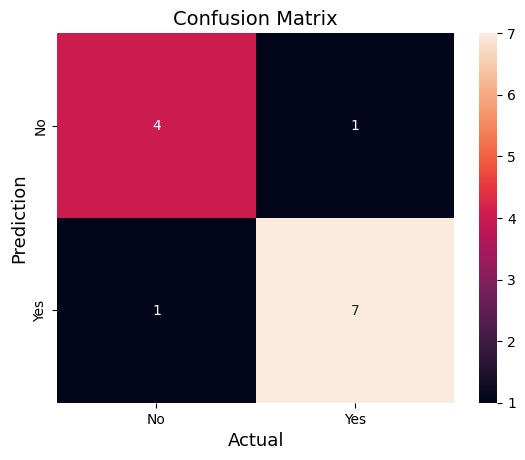

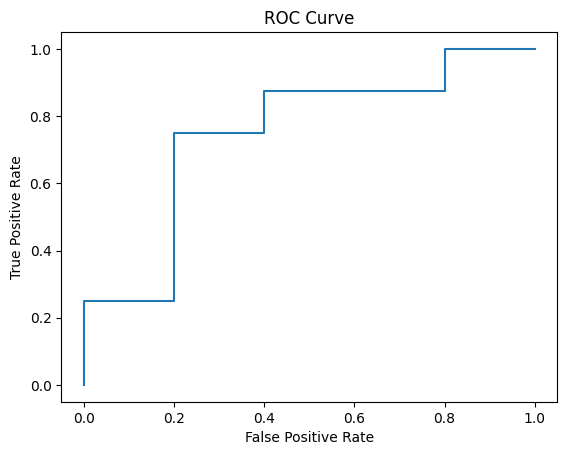

AUC: 75.0%
Accuracy: 84.62%
Precision: 87.5%
Recall: 87.5%
F1: 87.5%


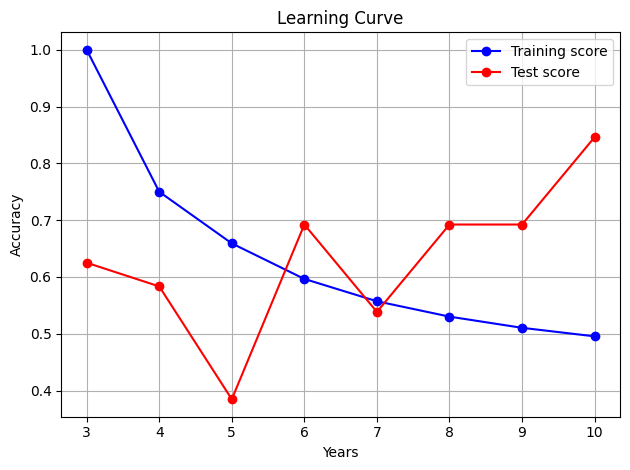

In [97]:
years = []
train_scores = []
test_scores = []

for year in df['year'].unique():
    if year < 3:
        continue

    print(f"---------------------- YEAR {year} ----------------------")

    class_utils.train_model_simple(classifier, df, year, target)

    y_test, y_test_prob, conf_test, y_train, y_train_prob, conf_train = class_utils.test_model(classifier, df, year,
                                                                                               target)

    y_test_pred = class_utils.enforce_max_teams(y_test_prob, conf_test)
    y_train_pred = class_utils.enforce_max_teams(y_train_prob, conf_train)

    eval.model_score(y_test, y_test_pred, y_test_prob, year == 10)

    years.append(year)
    test_scores.append(accuracy_score(y_test, y_test_pred))
    train_scores.append(accuracy_score(y_train, y_train_pred))

eval.plot_learning_curve(years, train_scores, test_scores)